# MLP

## Imports

In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import cm
import torch

## Datengrundlage

In [2]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

data = load_iris()
x = data["data"][:,:2]
y = np.where(data["target"]>=1,1,0) # target binarisieren

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=45)

## Perzeptron

In [ ]:
class Perceptron:
    def __init__(self,x):
        self.w = np.random.uniform(-1,1,size=(x.shape[1]))
        self.lr = 0.001

        self.error = []
        self.ws = []
        self.bs = []
        self.b = np.random.uniform(-1,1,size=1)

    def loss(self,y, prediction):
        # Clippen, um log(0) nicht undefiniert zu haben
        prediction = np.clip(prediction,0.0001,0.9999)
        loss = -np.mean(y*(np.log(prediction)) + (1-y)*np.log(1-prediction))
        return loss

    def accuracy(self,y, prediction):
        return 1-np.sum((prediction-y)**2)/y.shape[0]

    def predict(self,x):
        return np.where(np.dot(x,self.w)+self.b>=0,1,0)

    def iteration(self,x,y):
        errors = []

        # für jede Zeile in X
        for xi, yi in zip(x,y):
            prediction = self.predict(xi)
            errors.append(self.loss(yi, prediction))

            # Gewichte nach Lernregel anpassen
            self.w = self.w+self.lr*(yi-prediction)*xi
            self.b = self.b+self.lr*(yi-prediction)

        # Fehler speichern für Visualisierung
        self.error.append(np.mean(errors))
        self.ws.append(self.w)
        self.bs.append(self.b)

## Modell trainieren

In [ ]:
# Modell initialisieren
model = Perceptron(x)

# Epochen trainieren
for _ in range(200):
    model.iteration(x_train,y_train)

# Modell testen
model.accuracy(y_test,model.predict(x_test))

np.float64(0.98)

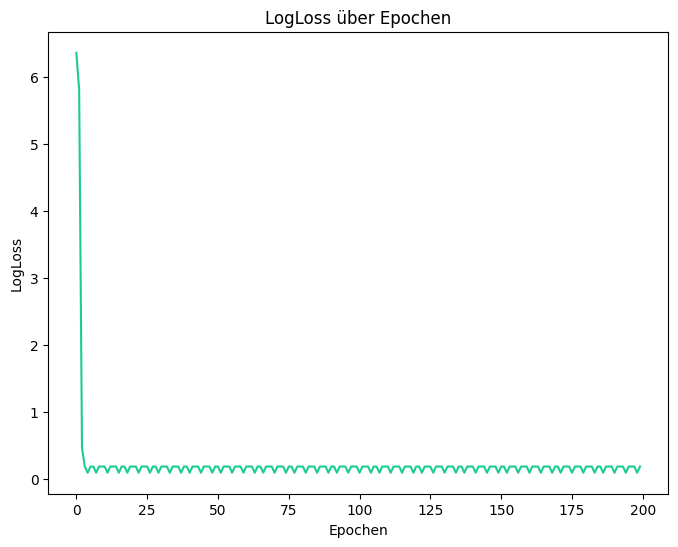

In [5]:
plt.figure(figsize=(8,6))
plt.plot(model.error,c="#1ACC94")
plt.title("LogLoss über Epochen")
plt.xlabel("Epochen")
plt.ylabel("LogLoss")
plt.show()

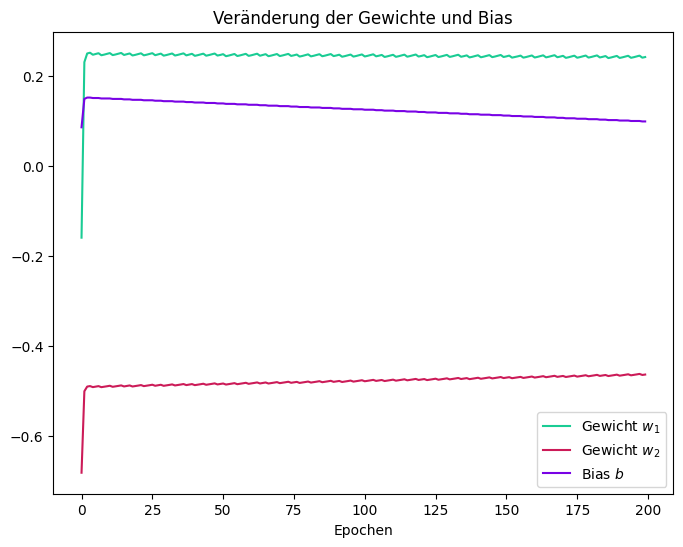

In [6]:
colors = ["#1ACC94","#CC1B58","#7902E5"]
plt.figure(figsize=(8,6))
for i, w in enumerate(np.array(model.ws).T):
    plt.plot(w,label="Gewicht $w_{}$".format(i+1),c=colors[i])
plt.plot(model.bs,label="Bias $b$",c=colors[-1])
plt.title("Veränderung der Gewichte und Bias")
plt.xlabel("Epochen")
plt.legend()
plt.show()

## Klassifikationsraum visualisieren

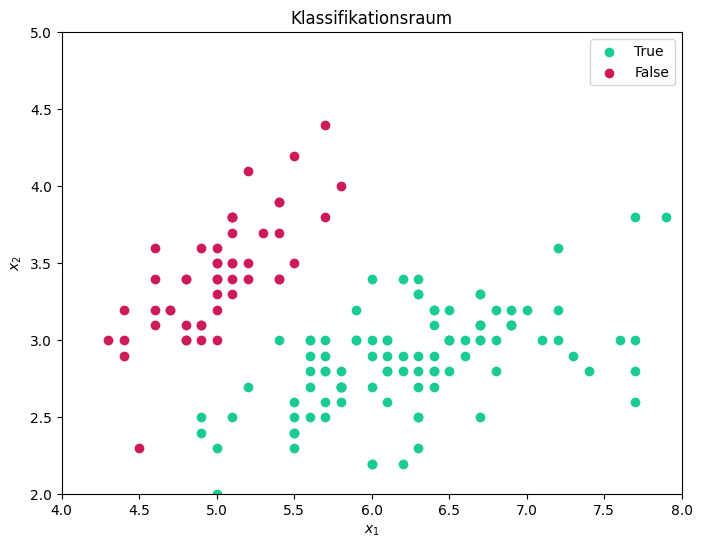

In [7]:
n = 500
z = []
meshgrid = np.meshgrid(np.linspace(4,8,n),np.linspace(2,5,n))
for value in np.nditer(meshgrid):
    z.append(model.predict(np.array(value)).item())

plt.figure(figsize=(8,6))
#plt.contour(meshgrid[0],meshgrid[1],np.array(z).reshape(n,n),cmap=cm.Greys,alpha=0.5)
plt.scatter(x[np.where(y==1),:1],x[np.where(y==1),1:2],c="#1ACC94",label="True")
plt.scatter(x[np.where(y==0),:1],x[np.where(y==0),1:2],c="#CC1B58",label="False")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(4,8)
plt.ylim(2,5)
plt.legend()
plt.title("Klassifikationsraum")
plt.show()

## Das XOR-Problem

In [8]:
logical_x = np.array([[1,1],[0,1],[1,0],[0,0]])
logical_y_or = np.array([1,1,1,0])
logical_y_and = np.array([1,0,0,0])
logical_y_xor = np.array([0,1,1,0])

In [ ]:
def train_model(x,y):
    model = Perceptron(x)
    for _ in range(1000):
        model.iteration(x,y)
    accuracy = model.accuracy(y,model.predict(x))*100
    return model, accuracy

def zgrid(meshgrid,model):
    z = []
    for value in np.nditer(meshgrid):
        prediction = model.predict(np.array(value))
        z.append(prediction)
    return np.array(z).reshape(meshgrid[0].shape[0],meshgrid[0].shape[1])


## Klassifikationsraum des XOR-Problems visualisieren

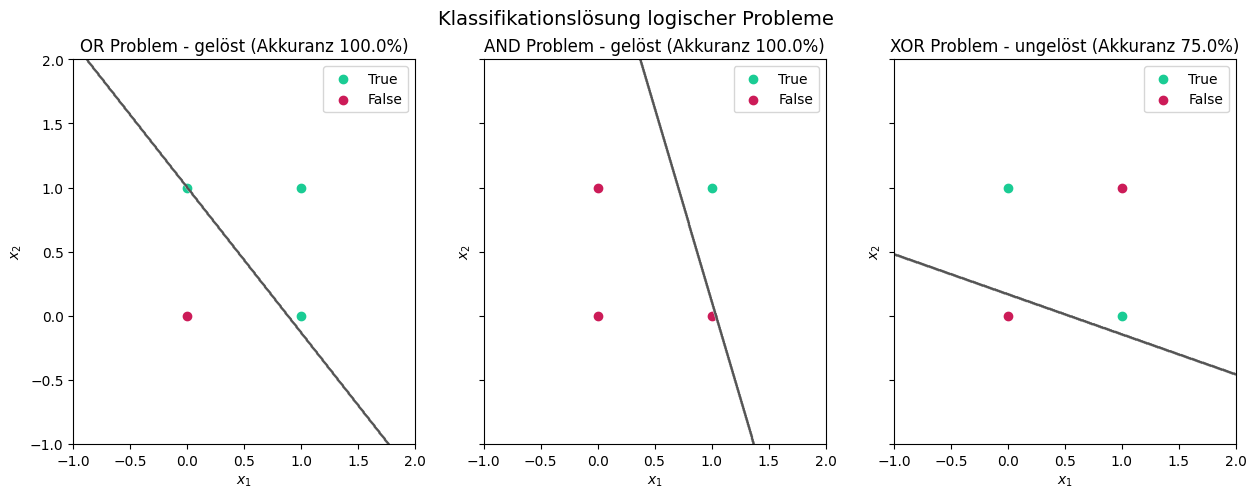

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
meshgrid = np.meshgrid(np.linspace(-1,2,n),np.linspace(-1,2,n))

fig.suptitle("Klassifikationslösung logischer Probleme", fontsize=14)

# Modell testen
model_or, accuracy_or = train_model(logical_x,logical_y_or)
axes[0].set_title("OR Problem - gelöst (Akkuranz {}%)".format(accuracy_or))
axes[0].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_or),cmap=cm.Greys,alpha=0.5)
axes[0].scatter(logical_x[np.where(logical_y_or==1),:1],logical_x[np.where(logical_y_or==1),1:],c="#1ACC94",label="True")
axes[0].scatter(logical_x[np.where(logical_y_or==0),:1],logical_x[np.where(logical_y_or==0),1:],c="#CC1B58",label="False")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].set_xlim(-1,2)
axes[0].set_ylim(-1,2)
axes[0].legend()

model_and, accuracy_and = train_model(logical_x,logical_y_and)
axes[1].set_title("AND Problem - gelöst (Akkuranz {}%)".format(accuracy_and))
axes[1].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_and),cmap=cm.Greys,alpha=0.5)
axes[1].scatter(logical_x[np.where(logical_y_and==1),:1],logical_x[np.where(logical_y_and==1),1:],c="#1ACC94",label="True")
axes[1].scatter(logical_x[np.where(logical_y_and==0),:1],logical_x[np.where(logical_y_and==0),1:],c="#CC1B58",label="False")
axes[1].set_xlabel("$x_1$")
axes[1].set_ylabel("$x_2$")
axes[1].legend()

model_xor, accuracy_xor = train_model(logical_x,logical_y_xor)
axes[2].set_title("XOR Problem - ungelöst (Akkuranz {}%)".format(accuracy_xor))
axes[2].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_xor),cmap=cm.Greys,alpha=0.5)
axes[2].scatter(logical_x[np.where(logical_y_xor==1),:1],logical_x[np.where(logical_y_xor==1),1:],c="#1ACC94",label="True")
axes[2].scatter(logical_x[np.where(logical_y_xor==0),:1],logical_x[np.where(logical_y_xor==0),1:],c="#CC1B58",label="False")
axes[2].set_xlabel("$x_1$")
axes[2].set_ylabel("$x_2$")
axes[2].legend()
plt.show()

## Perzeptronen hintereinander schalten

In [ ]:
# Die Prädiktionen der AND und OR Modelle werden zum Input für das XOR Modell
prediction_and = model_and.predict(logical_x).reshape(-1,1)
prediction_or = model_or.predict(logical_x).reshape(-1,1)
merged = np.concatenate([prediction_and,prediction_or],axis=1)

model_xor, accuracy_xor = train_model(merged,logical_y_xor)

class OneBigModel:
    def __init__(self,model_and,model_or,model_xor):
        self.model_and = model_and
        self.model_or = model_or
        self.model_xor = model_xor

    def predict(self,x):
        prediction_and = self.model_and.predict(x).reshape(-1,1)
        prediction_or = self.model_or.predict(x).reshape(-1,1)
        merged = np.concatenate([prediction_and,prediction_or],axis=1)

        return self.model_xor.predict(merged)

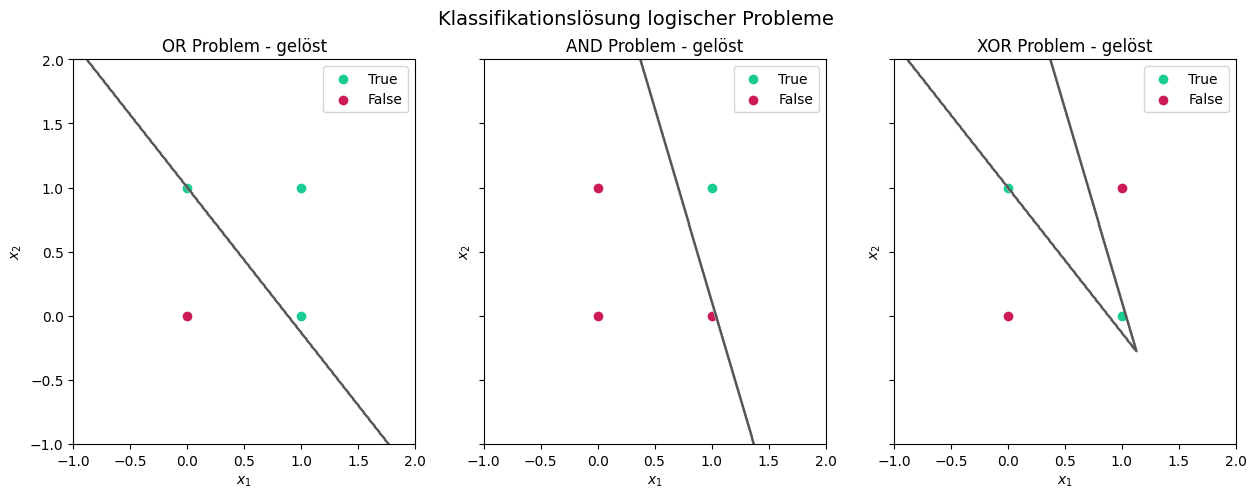

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
fig.suptitle("Klassifikationslösung logischer Probleme", fontsize=14)

# Modell testen
axes[0].set_title("OR Problem - gelöst")
axes[0].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_or),cmap=cm.Greys,alpha=0.5)
axes[0].scatter(logical_x[np.where(logical_y_or==1),:1],logical_x[np.where(logical_y_or==1),1:],c="#1ACC94",label="True")
axes[0].scatter(logical_x[np.where(logical_y_or==0),:1],logical_x[np.where(logical_y_or==0),1:],c="#CC1B58",label="False")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].set_xlim(-1,2)
axes[0].set_ylim(-1,2)
axes[0].legend()

axes[1].set_title("AND Problem - gelöst")
axes[1].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,model_and),cmap=cm.Greys,alpha=0.5)
axes[1].scatter(logical_x[np.where(logical_y_and==1),:1],logical_x[np.where(logical_y_and==1),1:],c="#1ACC94",label="True")
axes[1].scatter(logical_x[np.where(logical_y_and==0),:1],logical_x[np.where(logical_y_and==0),1:],c="#CC1B58",label="False")
axes[1].set_xlabel("$x_1$")
axes[1].set_ylabel("$x_2$")
axes[1].legend()

one_big_model = OneBigModel(model_and,model_or,model_xor)
axes[2].set_title("XOR Problem - gelöst")
axes[2].contour(meshgrid[0],meshgrid[1],zgrid(meshgrid,one_big_model),cmap=cm.Greys,alpha=0.5)
axes[2].scatter(logical_x[np.where(logical_y_xor==1),:1],logical_x[np.where(logical_y_xor==1),1:],c="#1ACC94",label="True")
axes[2].scatter(logical_x[np.where(logical_y_xor==0),:1],logical_x[np.where(logical_y_xor==0),1:],c="#CC1B58",label="False")
axes[2].set_xlabel("$x_1$")
axes[2].set_ylabel("$x_2$")
axes[2].legend()
plt.show()

## Neuronales Netz

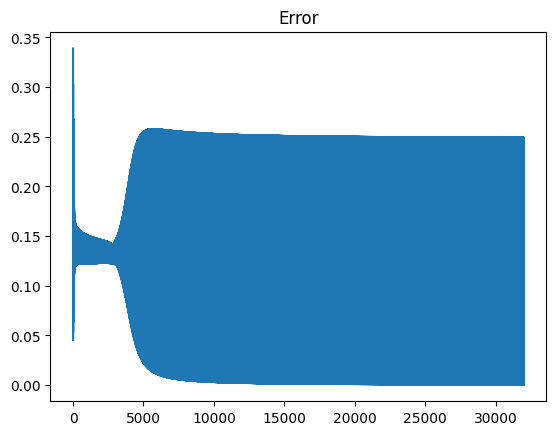

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#x_1, x_2 = 0.05, 0.1   # Input
y_1, y_2 = 0.01, 0.99  # Output
b_1, b_2 = 0.35, 0.6   # Bias
w = [0.5]*8            # Initial value for weights. Note that Python starts arrays with 0, so w[0] is w_1
#w = [0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.5, 0.55]
n = 0.5                # Learning rate


def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_diff(x):
    e = np.exp(-x)
    return e/(1 + e)**2

errors = []
counter = 1
for epoch in range(8000):

    for (x_1,x_2),y_1 in zip(logical_x,logical_y_xor):
        ### Forward Feeding ###
        # Step 1:
        h_1 = w[0] * x_1 + w[2] * x_2 + b_1
        h_2 = w[1] * x_1 + w[3] * x_2 + b_1
        # Step 1.5:
        out_h_1 = sigmoid(h_1)
        out_h_2 = sigmoid(h_2)
        # Step 2:
        y_tilde_1 = w[4] * out_h_1 + w[6] * out_h_2 + b_2
        y_tilde_2 = w[5] * out_h_1 + w[7] * out_h_2 + b_2

        out_y_tilde_1 = sigmoid(y_tilde_1)
        out_y_tilde_2 = sigmoid(y_tilde_2)

        # Step 3:
        error = 0.5 * ((y_1 - out_y_tilde_1)**2 + (y_2 - out_y_tilde_2)**2)
        #print('The error after ', counter, ' epochs: ', error)
        errors.append(error)  # For the visualization

        ### Back Propagation ###
        part_1 = -(y_1 - out_y_tilde_1) * sigmoid_diff(y_tilde_1)
        part_2 = -(y_2 - out_y_tilde_2) * sigmoid_diff(y_tilde_2)
        w[0] -= n * (part_1 * w[4] * sigmoid_diff(h_1) * x_1 + part_2 * w[5] * sigmoid_diff(h_1) * x_1)
        w[1] -= n * (part_1 * w[6] * sigmoid_diff(h_2) * x_1 + part_2 * w[7] * sigmoid_diff(h_2) * x_1)
        w[2] -= n * (part_1 * w[4] * sigmoid_diff(h_1) * x_2 + part_2 * w[5] * sigmoid_diff(h_1) * x_2)
        w[3] -= n * (part_1 * w[6] * sigmoid_diff(h_2) * x_2 + part_2 * w[7] * sigmoid_diff(h_2) * x_2)
        w[4] -= n * (part_1 * out_h_1)
        w[5] -= n * (part_2 * out_h_1)
        w[6] -= n * (part_1 * out_h_2)
        w[7] -= n * (part_2 * out_h_2)
        b_1 -= n * (part_1 * w[4] * sigmoid_diff(h_1) + part_2 * w[5] * sigmoid_diff(h_1))
        b_2 -= n * (part_1 + part_2)

        counter += 1

plt.figure()
plt.plot(errors)
plt.title("Error")
plt.show()




In [ ]:
class nn:
    def __init__(self,n_features):
        #self.ws_layer1 = [np.random.uniform(0,1) for i in range(n_features)]
        #self.ws_layer2 = np.random.uniform(0,1)
        #self.w = [0.5,0.5,0.5,0.5,0.5,0.5]
        self.w = [np.random.uniform(0,1) for i in range(6)]
        self.b = [np.random.uniform(0,1) for i in range(2)]

    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def sigmoid_diff(self,x):
        e = np.exp(-x)
        return e/(1 + e)**2

    def __call__(self,x):
        self.h1 = self.w[0]*x[0]+self.w[2]*x[1]+self.b[0]
        self.h2 = self.w[1]*x[0]+self.w[3]*x[1]+self.b[0]

        self.h1_out = self.sigmoid(self.h1)
        self.h2_out = self.sigmoid(self.h2)

        self.y = self.h1_out*self.w[4]+self.h2_out*self.w[5]+self.b[1]
        self.y_out = self.sigmoid(self.y)


        return self.y_out

  0%|          | 0/10000 [00:00<?, ?it/s]

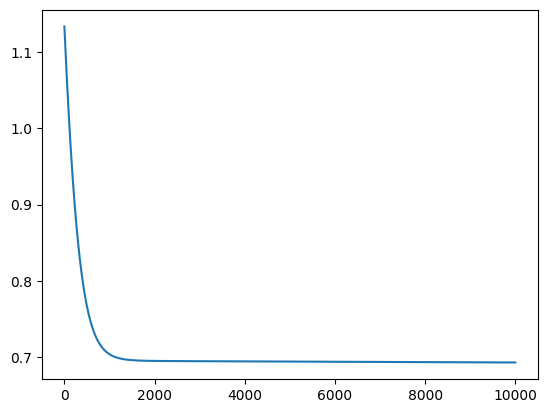

In [ ]:
#def error(prediction, y):
#    return np.sum(0.5*((prediction-y)**2))
def error(prediction, y):
    loss = -np.mean(y*(np.log(prediction)) + (1-y)*np.log(1-prediction))
    return loss

net = nn(2)

epoch_loss = []
for epoch in tqdm(range(10000)):
    batch_loss = []
    for x,y in zip(logical_x,logical_y_xor):

        prediction = net(x)
        loss = error(prediction,y)

        lr = 0.001

        A = (-y/(net.y_out)+((1-y)/(1-net.y_out)))*net.sigmoid_diff(net.y)

        deriv_w0 = A*net.w[4]*net.sigmoid_diff(net.h1)*x[:1]
        deriv_w1 = A*net.w[5]*net.sigmoid_diff(net.h2)*x[:1]
        deriv_w2 = A*net.w[4]*net.sigmoid_diff(net.h1)*x[1:]
        deriv_w3 = A*net.w[5]*net.sigmoid_diff(net.h2)*x[1:]
        deriv_w4 = A*net.h1_out
        deriv_w5 = A*net.h2_out

        deriv_b0 = A*(net.w[4]*net.sigmoid_diff(net.h1)+net.w[5]*net.sigmoid_diff(net.h2))
        deriv_b1 = A

        net.w[0] = net.w[0] - lr * deriv_w0
        net.w[1] = net.w[1] - lr * deriv_w1
        net.w[2] = net.w[2] - lr * deriv_w2
        net.w[3] = net.w[3] - lr * deriv_w3
        net.w[4] = net.w[4] - lr * deriv_w4
        net.w[4] = net.w[4] - lr * deriv_w5

        net.b[0] = net.b[0] - lr * deriv_b0
        net.b[1] = net.b[1] - lr * deriv_b1

        batch_loss.append(loss)
        #break
    epoch_loss.append(np.mean(batch_loss))

plt.plot(epoch_loss)

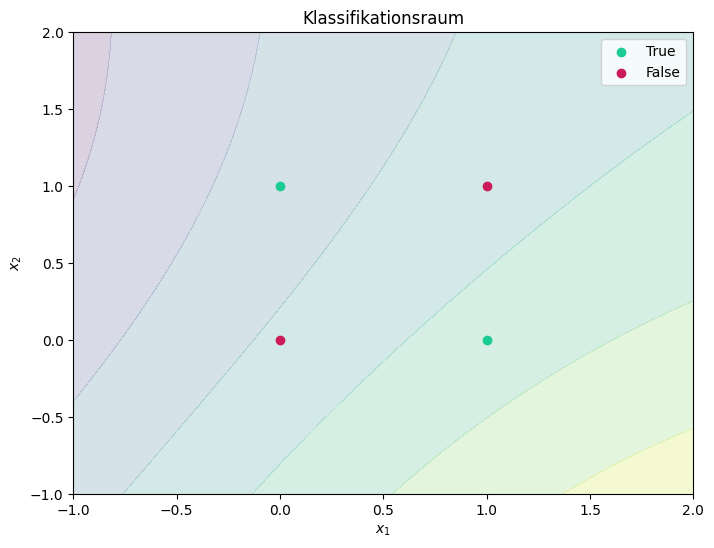

In [16]:
n = 100
z = []
meshgrid = np.meshgrid(np.linspace(-1,2,n),np.linspace(-1,2,n))
for value in np.nditer(meshgrid):

    z.append(net(np.array(value)))
   # z.append(model(torch.tensor(np.array(value),dtype=torch.float)).detach())

plt.figure(figsize=(8,6))
plt.contourf(meshgrid[0],meshgrid[1],np.array(z).reshape(n,n),alpha=0.2)
plt.scatter(logical_x[np.where(logical_y_xor==1),:1],logical_x[np.where(logical_y_xor==1),1:],c="#1ACC94",label="True")
plt.scatter(logical_x[np.where(logical_y_xor==0),:1],logical_x[np.where(logical_y_xor==0),1:],c="#CC1B58",label="False")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.legend()
plt.title("Klassifikationsraum")
plt.show()

In [17]:
logical_x[np.where(logical_y_xor==1),:1]

array([[[0],
        [1]]])

In [18]:
import torch

In [19]:
x_torch = torch.tensor(logical_x)
y_torch = torch.tensor(logical_y_xor)

  0%|          | 0/10000 [00:00<?, ?it/s]

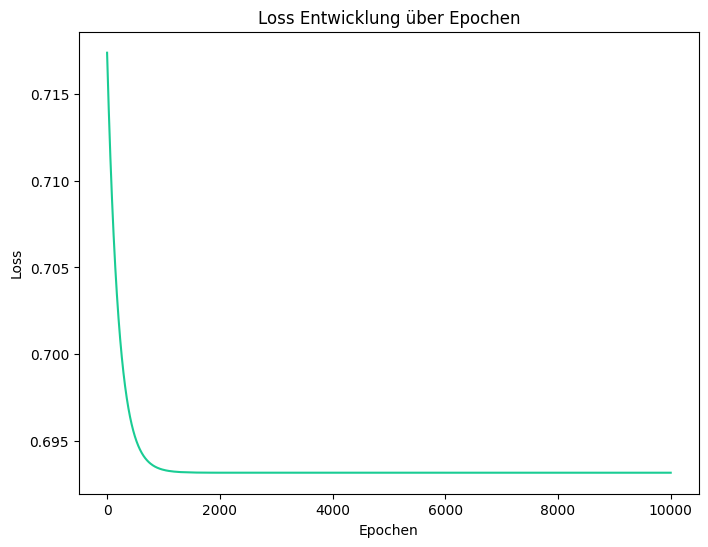

In [ ]:
import pandas as pd
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(2,2)
        self.fc2 = nn.Linear(2,2)
        self.fc3 = nn.Linear(2,1)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

x_torch = torch.tensor(logical_x,dtype=torch.float).view(-1,2)
y_torch = torch.tensor(logical_y_xor,dtype=torch.float)

model = Model()
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_errors = []

for epoch in tqdm(range(10000)):
    optimizer.zero_grad()
    prediction = model(x_torch).view(4)
    error = loss(prediction,y_torch)
    epoch_errors.append(error.item())
    error.backward()
    optimizer.step()

plt.figure(figsize=(8,6))
plt.plot(epoch_errors,color="#1ACC94")
plt.title('Loss Entwicklung über Epochen')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.show()

In [21]:
x_torch.shape

torch.Size([4, 2])